In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geometry_tools as gt
import convex_hull
import separability as sep

plt.ion()

In [2]:
df = pd.read_csv('datasets/iris.csv') # Separavel
#df = pd.read_csv('datasets/banana.csv') # Não separavel
#df = pd.read_csv('datasets/haberman.csv') # Não separavel

P1 = df.query("t == ' Iris-setosa'").reset_index()[['x', 'y']]
P2 = df.query("t == ' Iris-versicolor'").reset_index()[['x', 'y']]

#P1 = df.query("t == -1").reset_index()[['x', 'y']]
#P2 = df.query("t == 1").reset_index()[['x', 'y']]

#P1 = df.query("t == ' negative'").reset_index()[['x', 'y']]
#P2 = df.query("t == ' positive'").reset_index()[['x', 'y']]


P1 = P1.values.tolist()
P2 = P2.values.tolist()

In [3]:
H1 = sep.convex_segments(P1)
H2 = sep.convex_segments(P2)

separavel = sep.separability(H1, H2)

if separavel == False:
    class1, class2 = sep.class_model(H1, H2)

    points = sep.shortest_points(H1, H2)
    pm = gt.Point(((points[0].x + points[1].x)/2), ((points[0].y + points[1].y)/2))
    val = max(max(H1, key=lambda p: p.x).x, max(H1, key=lambda p:p.y).y)
    line = [gt.Point(pm.x - val, pm.y + val), gt.Point(pm.x + val, pm.y - val)]
    m = len(H1)
    n = len(class1)
    
    prev = []
    for i in H1:
        if i in class1:
            prev.append(i)
    k = len(prev)
    precisao = k / n
    revocacao = k / m
    F = 2*((precisao * revocacao)/(precisao + revocacao))
        
    print("Para a classe 1")
    print("Precisao = " + str(precisao) + ", Revocaçao = " + str(revocacao) + ", F-measure = " + str(F))
    
    m = len(H1)
    n = len(class1)
    prev = []
    for i in H1:
        if i in class1:
            prev.append(i)
    k = len(prev)
    precisao = k / n
    revocacao = k / m
    F = 2*((precisao * revocacao)/(precisao + revocacao))
        
    print("\nPara a classe 2")
    print("Precisao = " + str(precisao) + ", Revocaçao = " + str(revocacao) + ", F-measure = " + str(F))
        
    print("\nÉ separavel ? " + str(not(separavel)))


Para a classe 1
Precisao = 0.5384615384615384, Revocaçao = 0.875, F-measure = 0.6666666666666667

Para a classe 2
Precisao = 0.5384615384615384, Revocaçao = 0.875, F-measure = 0.6666666666666667

É separavel ? True


In [4]:
CH1 = H1
CH2 = H2
CH1.append(H1[0])
CH2.append(H2[0])

x, y = [], []
for i in CH1:
    x.append(i.x)
    y.append(i.y)

w, z = [], []
for i in CH2:
    w.append(i.x)
    z.append(i.y)

In [5]:
if separavel == False:
    a, b = [], []  
    for i in class1:
        a.append(i.x)
        b.append(i.y)
    
    c, d = [], []  
    for i in class2:
        c.append(i.x)
        d.append(i.y)
    
    e, f = [], []  
    for i in line:
        e.append(i.x)
        f.append(i.y)

    g, h = [], []
    for i in points:
        g.append(i.x)
        h.append(i.y)

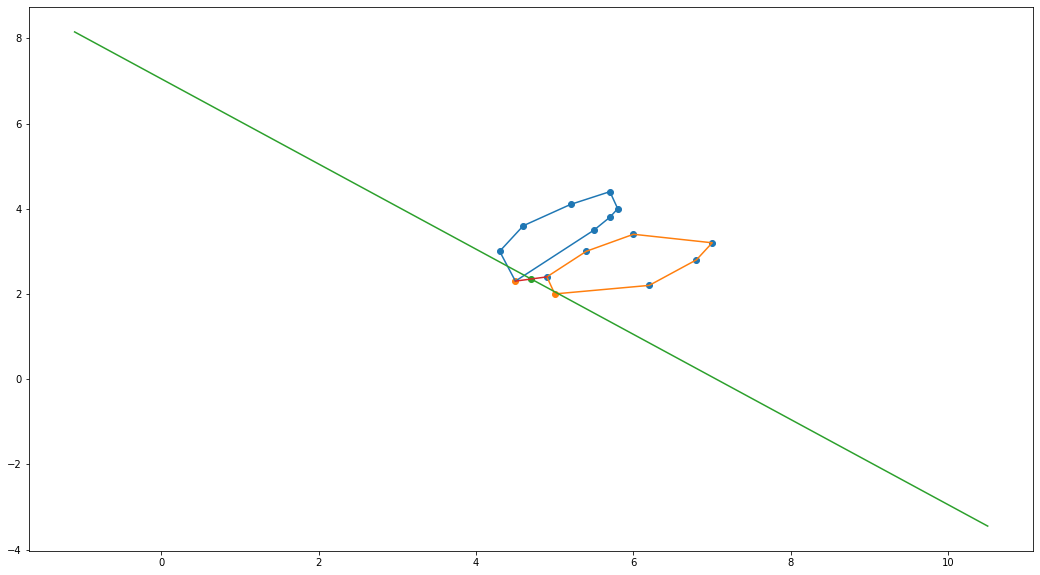

In [6]:
plt.figure(figsize=(18, 10))
plt.plot(x, y)
plt.plot(w, z)

if separavel == False:
    plt.plot(e, f)
    plt.plot(g, h)

    plt.scatter(a, b)
    plt.scatter(c, d)
    plt.scatter(pm.x, pm.y)